In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In this code block, I imported essential libraries for data visualization and sentiment analysis within my machine learning project.

- **Matplotlib**: Used it for creating visualizations.
- **Pandas**: Employed it for data manipulation and analysis.
- **Seaborn**: Enhanced the style and aesthetics of Matplotlib plots.
- **NLTK VADER SentimentIntensityAnalyzer**: Imported it for conducting sentiment analysis tasks on textual data.

In [13]:
data = pd.read_csv('dataset/hotel_reviews.csv')
display(data.head())

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


I loaded the dataset from a CSV file named 'hotel_reviews.csv' into a Pandas DataFrame, then I displayed the first few rows of the loaded dataset for initial data exploration.

In [14]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


None

Used the .info() method to obtain an overview of the dataset's structure, including data types, missing values, and more.

In [15]:
display(data.isnull().sum())

Review    0
Rating    0
dtype: int64

I checked for missing values within the dataset using the .isnull() method and calculated the sum of missing values for each column.

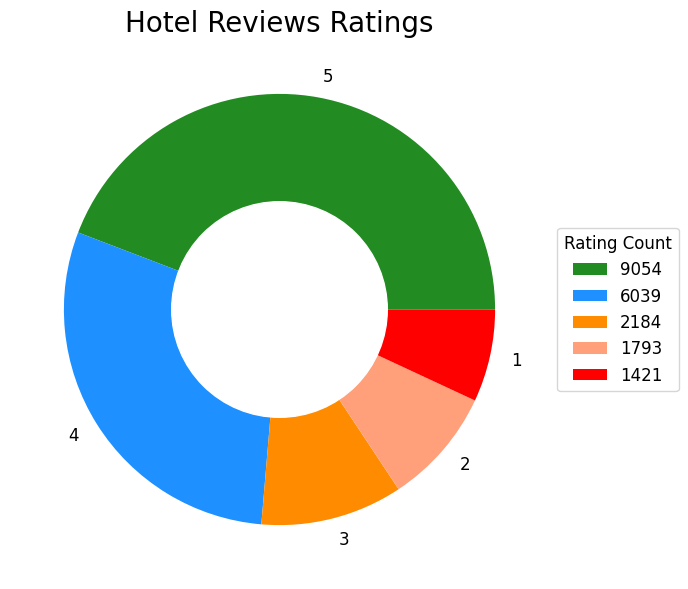

In [16]:
ratings = data['Rating'].value_counts()
index = ratings.index
values = ratings.values

custom_colors = ['forestgreen', 'dodgerblue', 'darkorange', 'lightsalmon', 'red']
plt.figure(figsize=(7, 7))
plt.pie(values, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Hotel Reviews Ratings', fontsize=20)

legend_labels = [f'{count}' for rating, count in zip(index, values)]
plt.legend(legend_labels, title="Rating Count", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

I created this graph to illustrate the distribution of hotel review ratings. Each colored segment of the pie chart represented a different rating category, and the size of each segment corresponded to the number of reviews with that specific rating. I added a legend to display the actual count of reviews for each rating category, providing a clear visual representation of the quantity of ratings in the dataset.

The data reveals that the majority of guests have provided either a 5-star or a 4-star rating for the hotel services. These high ratings indicate a high level of satisfaction among most guests regarding the quality of the services they experienced during their stay. With this initial insight, I can now proceed to analyze the sentiments expressed in the hotel reviews in more detail.

In [17]:
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['Review']]
display(data.head())

,Review,Rating,Positive,Negative,Neutral
0,nice hotel expensive parking got good deal sta...,4,0.285,0.072,0.643
1,ok nothing special charge diamond member hilto...,2,0.189,0.110,0.701
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.081,0.700
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.060,0.555
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.135,0.643


In this code block, I utilized the NLTK VADER SentimentIntensityAnalyzer to perform sentiment analysis on the textual data within the dataset. The following actions were taken:

- Created an instance of the SentimentIntensityAnalyzer class to analyze the sentiment of text data.
- Calculated the positive, negative, and neutral sentiment scores for each review in the dataset using list comprehensions and the polarity_scores method provided by the SentimentIntensityAnalyzer.
- Added three new columns ('Positive', 'Negative', and 'Neutral') to the dataset, each containing the corresponding sentiment score for the reviews.
- Displayed the first few rows of the updated dataset to provide an initial look at the sentiment analysis results.

This process allows for a more in-depth understanding of the sentiment distribution within the dataset and can be valuable for further analysis and insights.

As per the feedback from the reviews, it appears that the hotel guests express contentment with the quality of services provided. I will now delve into the sentiment analysis of these reviews.

In [18]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print('Positive 😊')
    elif (b > a) and (b > c):
        print('Negative 😠')
    else:
        print('Neutral 🙂')
        
sentiment_score(x, y, z)

Neutral 🙂


In this code block:

- Calculated the total positive, negative, and neutral sentiment scores for the entire dataset using the `sum()` function and the respective columns from the Pandas DataFrame.
- Defined a custom function `sentiment_score(a, b, c)` that takes the total positive, negative, and neutral scores as inputs and determines the overall sentiment of the dataset.
- Printed the overall sentiment label, which can be 'Positive 😊' if positive sentiment dominates, 'Negative 😠' if negative sentiment dominates, or 'Neutral 🙂' if the sentiment is relatively balanced.

This code provides a high-level summary of the sentiment distribution within the dataset, simplifying the analysis to a single sentiment label based on the calculated scores.

Hence, it can be inferred that the majority of individuals hold a neutral sentiment when evaluating the hotel services. I will now conduct a detailed examination of the sentiment scores.

In [19]:
print(f'Positive: {x:.2f}')
print(f'Negative: {y:.2f}')
print(f'Neutral: {z:.2f}')

Positive: 6359.91
Negative: 1473.48
Neutral: 12657.63


In this code block, I:

- Printed the total positive sentiment score (`x`) with two decimal places using the `f-string` and the `:.2f` format specifier.
- Printed the total negative sentiment score (`y`) with two decimal places in a similar manner.
- Printed the total neutral sentiment score (`z`) with two decimal places using the `f-string`.

This code provides a clear and concise display of the total sentiment scores, making it easy to understand the overall distribution of sentiment within the dataset.

Based on the aforementioned findings, it is evident that over 12,000 reviews fall within the category of neutrality, while more than 6,000 reviews exhibit a positive sentiment. This observation underscores the high level of satisfaction among individuals who have experienced hotel services. Additionally, it is worth noting that the number of negative reviews is notably low, totaling fewer than 1,500 instances.